# High dimensional integration by Metropolis

The classical method for high-dimensional integration is the
*Vegas* algorithm, discussed before. However, *Vegas*
can not resolve poles, which are not along one of the axis.

Problem in physics  very commonly require integrals over space of many
coordinates, and might have the form:
\begin{eqnarray}
I(\vec{r}_0) = \int f(\vec{r}_0,\vec{r}_1,\vec{r}_2,\cdots,\vec{r}_N) d^3\vec{r}_1 d^3\vec{r}_2\cdots d^3\vec{r}_N
\end{eqnarray}
Here $f$ might have poles for many combinations of $\vec{r}_i-\vec{r}_j$  or
$\vec{r}_i-\vec{r}_j-\vec{r}_k$, etc.

For a concrete example, we will think of the following convolutions
\begin{eqnarray}
I(\vec{r}_0) = {\cal N}
\int 
e^{-\frac{(\vec{r}_1-\vec{r}_0)^2}{w^2}} 
e^{-\frac{(\vec{r}_2-\vec{r}_1)^2}{w^2}} \cdots
e^{-\frac{(\vec{r}_{N-1}-\vec{r}_{N})^2}{w^2}} 
e^{-\frac{{\vec{r}_N}^2}{w^2}} 
d^3\vec{r}_1  d^3\vec{r}_2\cdots d^3\vec{r}_N
\end{eqnarray}
with noralization 
${\cal N}= \frac{(N+1)^{3/2}}{(w \sqrt{\pi})^{3 N}},$
the value of the integral is 
$I(\vec{r}_0)=e^{-\frac{\vec{r}_0^2}{(N+1) w^2}}$


If width $w$ is small, this is very difficult problem for MC,
even for moderate values of $N$.


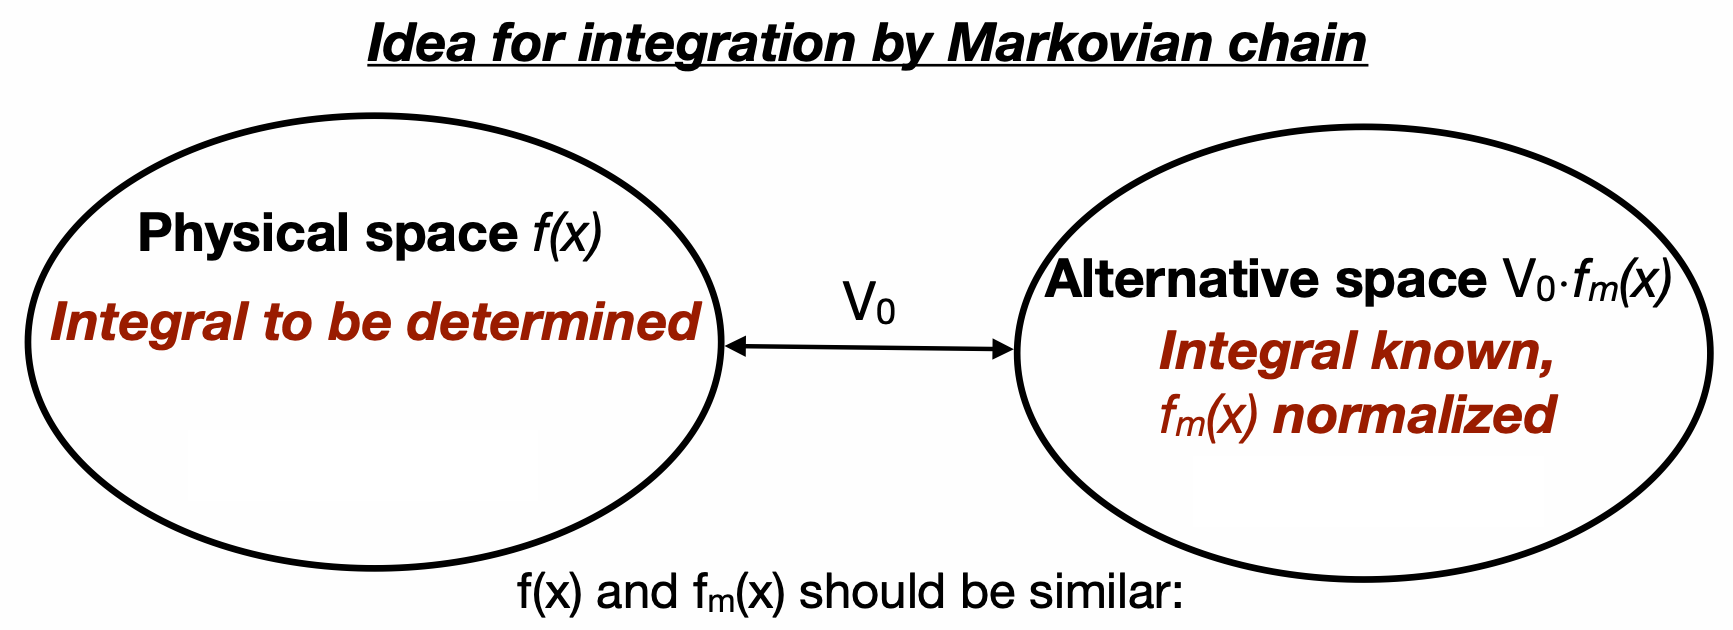

We could create a Markov's chain and take as the probability for a step proportionaly to $|f(x)|$, i.e, the $T(X\rightarrow X') = min(|f(X')|/|f(X)|,1)$. Here $X$ stands for configuration $(\vec{r}_0,\vec{r}_1,\cdots,\vec{r}_N)$.

We would meassure $f(X)/|f(X)|=\textrm{sign}(f(X))$. As a result we would get correct shape of the function $I(\vec{r}_0)$, however, the integral itself would be unknown. 

## Jumping between spaces

The most common way to determine the unknown constant is to define two spaces, the **Physical space** and the **Alternative space**. The function in the alternative space should be as similar as possible to the function we are integrating, but its integral must be known, and we should be allowed to jump between the two spaces. Suppose the function in the alternative space is $V_0 f_m(X)$, where $f_m(X)$ is normalized to unity ($\int f_m(X) dX=1$) and positive function, and $V_0$ is an arbitrary constant.



Probability density in the physical space $P(X)$ is then taken to be proportional to $|f(x)|$ in the physical Hilbert space, and $V_0 f_m(x)$ in the alternative space. The probability to visit a configuration $X$ in the physical and alternative space would be:
\begin{eqnarray}
& P_{physical}(X) = & |f(X)| \; {\cal C}\\
& P_{alternative}(X) = & V_0 f_m(X) \; {\cal C}
\end{eqnarray}

In Metropolis we would have two types of moves:
* jump from configuration $X\rightarrow X'$
* jump between the two spaces.

If we are in the Physical Hilbert space, we would accept the step with $T(X\rightarrow X') = min(|f(X')|/|f(X)|,1)$. If we are in alternative space, we would accept the step with 
$T(X\rightarrow X') = min(f_m(X')/f_m(X),1)$, and if we are jumping from Physical to the alternative space, we would have $T(X_p\rightarrow X'_a) = min(V_0 f_m(X'_a)/|f(X)|,1)$.

More precisely, if there is non-symmetric trial step probability, the Metropolis acceptance probability would be $A(X\rightarrow X')=min\left(1,\frac{|f(X')|\omega_{X'\rightarrow X}}{|f(X)|\omega_{X\rightarrow X'}}\right)$, where $\omega_{X'\rightarrow X}$ is the trial step probability. But let's first think of steps which have symmetric trial step probability.

We would than sample the following quantities 
\begin{eqnarray}
V_{physical}= \sum_{i=physical} \frac{f(X_i)}{|f(X_i)|}
\end{eqnarray}
when we are in the physical space, and when we are in alternative space we would just count steps in this space
\begin{eqnarray}
V_{alternative}= \sum_{i=alternative} 1
\end{eqnarray}

These quantities will converge to the following values
\begin{eqnarray}
V_{physical} &=& {\cal C} \int dX\; |f(X)|  \frac{f(X)}{|f(X)|}\\
V_{alternative} &=& {\cal C} \int dX\; V_0 |f_m(X)| 1
\end{eqnarray}
where $C$ is an arbitrary number, which we do not know. This is because the probability to reach a configuration $X$ in the Physical space is $\propto dX |f(X)|$ and in alternative space is $\propto dX V_0 |f_m(X)|$.


Because the function in alternative space is normalized $\int dX |f_m(x)|=1$, we conclude that 
\begin{eqnarray}
\frac{V_{physical}}{V_{alternative}}=\frac{1}{V_0} \int dX f(X)
\end{eqnarray}
hence we know the integral 
\begin{eqnarray}
\int dX f(X) = V_0 \frac{V_{physical}}{V_{alternative}}=V_0 \frac{\sum_{i\in physical} \textrm{sign}(f(X_i))}{\sum_{i\in alternative} 1}
\end{eqnarray}


The art in this approach is to find a good function $f_m(X)$, which we know how to normalize, and adjust $V_0$ so that we spent some finite (but not too much time) in alternative space. A good rule is 90% in physical space, and 10% in alternative space.

The best approach is to self-consistently determine both $f_m(X)$ and the constant $V_0$ during the sampling.

But before we discuss how to determine both, we would sketch a simpler, and usually even more efficient, algorithm.

## Evaluation of both functions on each configuration

Alternatively we can define the probability for visiting configuration $X$ to be 
\begin{eqnarray}
P \propto |f(X)|+ V_0 f_m(X)
\end{eqnarray}
and we could have only the physical space of configurations $X$, on which we would simultaneously evaluate both $f(X)$ and $f_m(X)$.  

We have freedom to adjust $V_0$. The idea is to adjust $V_0$ so that on average $|f(X)|$ is around 10-times larger than $V_0 f_m(X)$. As a result we would still visit most often those configurations in which function $|f(X)|$ is large, and if $f_m(X)$ is similar to $f(X)$ we would not visit configurations where $|f(X)|$ is very small. Even if the overlap between $f(X)$ and $f_m(X)$ is small, we will still visit configurations where $f(X)$ is large more often, because we will make sure that $V_0$ is such that on avergae $f(X)$ contributes more to the weight that $V_0 f_m(X)$.



The transition probability is therefore 
\begin{eqnarray}
T(X\rightarrow X') = \frac{|f(X')| + V_0 f_m(X')}{|f(X)| + V_0 f_m(X)}
\end{eqnarray}

We will sample two quantities
\begin{eqnarray}
V_{physical} = \sum_i \frac{f(X_i)}{|f(X_i)| + V_0 f_m(X_i)}\\
V_{alternative} = \sum_i \frac{V_0 f_m(X_i)}{|f(X_i)| + V_0 f_m(X_i)}
\end{eqnarray}

The two quantities will converge towards
\begin{eqnarray}
V_{physical} &=& {\cal C}\int dX\; (|f(X)| + V_0 f_m(X)) \frac{f(X)}{|f(X)| + V_0 f_m(X)} = {\cal C} \int dX f(X) \\
V_{alternative} &=& {\cal C} \int dX\; (|f(X)| + V_0 f_m(X)) \frac{V_0 f_m(X)}{|f(X)| + V_0 f_m(X)}={\cal C}\; V_0
\end{eqnarray}

The desired integral will again be
\begin{eqnarray}
\int dX f(X) = V_0 \frac{V_{physical}}{V_{alternative}}
\end{eqnarray}

During the simulations of the Markov chain we will adjust $V_0$ so that 
\begin{eqnarray}
\frac{\widetilde{V}_{physical}}{V_{alternative}} \approx 10,
\end{eqnarray}
where 
\begin{eqnarray}
\widetilde{V}_{physical}=\sum_i \frac{|f(X_i)|}{|f(X_i)| + V_0 f_m(X_i)}
\end{eqnarray}

Suppose that during simulation we realize that currently $\frac{\widetilde{V}_{physical}}{V_{alternative}} \approx 1$. It means that $V_{alternative}$ is around 10-times too large, hence we would reduce $V_0$ for a factor (maybe 2 initially, and than recheck). We would also need to reduce with the same constant the current sum $V_{alternative}$, because it is proportional to $V_0$. We will keep adjusting $V_0$ untill the ratio of $\frac{\widetilde{V}_{physical}}{V_{alternative}}$ is close to the desired number.

## Measuring function

We are left to determine the optimal function $f_m(X)$, which is as similar as possible to $|f(X)|$, but with added constrained that is normalizable, i.e., $\int dX f_m(X)=1$.

An obvious choice (think of Vegas) is a separable ansatz:
\begin{eqnarray}
f_m(X=(\vec{r}_1,\vec{r}_r,\cdots,\vec{r}_N))=g_1(r_1) g_2(r_2)\cdots g_N(r_N)
\end{eqnarray}

To determine the projections $g_i(r_i)$, we would self-consistently project the sampled function $|f(X)|$ to all axis, just like in Vegas algorithm:
\begin{eqnarray}
g_i(x)\propto \int d\vec{r_1} d\vec{r}_2 \cdots d\vec{r}_N |f(X)|\delta(r_i-x)
\end{eqnarray}

The integration of separable function is simple
\begin{eqnarray}
\int dX f_m(X) = \prod_{i} \int d\vec{r}_i g_i(r_i)
\end{eqnarray}
To avoid systematic error, we will not treat $g_i(r_i)$ function as continuous function, but rather as a step-wise constant function, with the following property
\begin{eqnarray}
g(x) = \sum_{l=0}^{M-1} g[l]\theta(x_l<x<x_{l+1}).
\end{eqnarray}
Unfortunately this makes analysis tedious, and integrals a bit more involved.


Newertheless, for separable function, we can readily compute
\begin{eqnarray}
&&1D : \int d\vec{r}_i g_i(r_i)= \Delta \sum_{l=0}^{M-1} g_i[l]\\
&&3D : \int d\vec{r}_i g_i(r_i)= \frac{4\pi \Delta^3}{3} \sum_{l=0}^{M-1} ((l+1)^3-l^3)g_i[l]
\end{eqnarray}

For more complicated ansatz of convolutions, the analytic formulas can still be derived, and the equations are given below.

# Implementation

Here we will not show all details of implementing the measuring function. It is implemented in module `mweight.py`, which we will include here. We will rather implement Metropolis Markov's chain and wew will use 3D-convolutions as the measuring function.

To test the implementation, we will use Gaussian functions, with peaks along the diagonals (not along the axes). The Gausian's have the form
\begin{eqnarray}
f(k_0,k_1,\cdots k_{N-1}) = C e^{k_{N-1}^2/w^2} e^{-|k_{N-2}-k_{N-1}|^2/w^2} e^{-|k_{N-3}-k_{N-2}|^2/w^2}\cdots e^{-|k_1-k_0|^2/w^2}
\end{eqnarray}
where 
\begin{eqnarray}
C = \frac{N^{3/2} }{ ( \sqrt{\pi} w )^{3(N-1)}}
\end{eqnarray}


In [16]:
from scipy import *
from mweight import *
from numpy import linalg
from numpy import random
from scipy import special
import sys
import numpy as np
from numba import jit

class FuncNDiag:
    """  Gaussian through all diagonals k_i=k_j, i.e.:
    We have the following variables : k_0, k_1, k_2, ... k_{N-1}
    The function is
       fPQ = exp(k_{N-1}^2/width^2) * exp(|k_{N-2}-k_{N-1}|^2/width^2) * exp(-|k_{N-3}-k_{N-2}|^2/width^2) *...* exp(-|k_1-k_0|^2/width^2) * normalization
   We integrate only over k_1,k_2,...k_{N-1} and keep k_0 as external independent variable.
   We want the final result to be
      exp(-k_0^2/(width^2*N)) = Integrate[ fPQ d^3k_1 d^3k_2....d^3k_{N-1} ]
   Hence the normalization is
       normalization = N^(3/2) / ( sqrt(pi)*width )^(3(N-1))
    """
    def __init__(self, width=1, Ndim=1):
        self.width = width   # width of gaussians
        self.Ndim = Ndim
        self.cnrm = ((sqrt(pi)*self.width)**3 )**(Ndim-1)/sqrt(Ndim)**3  # integral of gaussian convolution

    def __call__(self, momentum):
        kn = np.linalg.norm( momentum[-1] )
        res = exp( -(kn/self.width)**2 )/self.cnrm
        for i in range(len(momentum)-1):
            dk = np.linalg.norm( momentum[i+1]-momentum[i] )
            res *= exp( -(dk/self.width)**2 )
        return res


We will define several parameters for MC integration

In [6]:
class params:
    def __init__(self):
        self.kF = 1.             # typical momentum
        self.cutoff = 3*self.kF  # integration cutoff
        self.dkF = 0.1*self.kF   # the size of a step
        #
        self.Nitt = 1000000   # total number of MC steps
        self.Ncout = 50000    # how often to print
        self.Nwarm = 1000     # warmup steps
        self.tmeassure = 10   # how often to meassure
        #
        self.Nbin = 129       # how many bins for saving the histogram
        self.V0norm = 2e-2    # starting V0
        self.dexp = 6         # parameter for fm at the first iteration, we will use 
        
        self.recomputew = 2e4/self.tmeassure # how often to check if V0 is correct
        self.per_recompute = 7 # how often to recompute fm auxiliary measuring function

This is the core of the algorithm, which implements the Metropolis random walk, and measures both functions $f$ and $f_m$ on each configuration, using $|f|+V_0 f_m$ as the weight of each configuration.

At the first iteration, the weight function $f_m$ will be 

$$f_m(r) \propto \theta(r<k_F) + \left(\frac{k_F}{r}\right)^{dexp} \theta(r>k_F) $$

Later it is adjusted to

\begin{eqnarray}
 f_m(\vec{r}_1,\vec{r}_2,\cdots,\vec{r}_n)= g_1(r_1) h_1(|\vec{r}_n-\vec{r}_1|)
g_2(r_2)h_2(|\vec{r}_n-\vec{r}_2|)\cdots g_n(r_n)
\end{eqnarray}

where $g_i$ and $h_i$ are determined self-consistently from the histograms.

The external variable $r_0$ will be computed on the user defined mesh, which is named `qx[i]`.

Since $r_0$ is only the length of the vector in 3D, we will sample (and integrate) over its angles $\theta$ and $\phi$. Here 
$$\vec{r}_0=\left(qx_i \sin(\theta)\cos(\phi), qx_i \sin(\theta)\sin(\phi), qx_i \cos(\theta)\right).$$

However, when we choose variables $(r,\theta,\phi)$ instead of $(x,y,z)$ the trial step probability is not symmetric, because we want to integrate uniformly over the entire volume $d(\cos(\theta)) d\phi\, d^3r_1 d^3 r_2\cdots d^3 r_N $. 

The probability to jump into any configuration is proportional to its contribution to the volume, i.e, $\omega_{X\rightarrow X'} = \frac{d\Omega_{X'}}{d\Omega_{X}}= \frac{sin(\theta_{X'}) d\theta d\phi}{sin(\theta_{X}) d\theta d\phi} = \frac{sin(\theta_{X'})}{sin(\theta_{X})}$. If we were sampling the integral over $r$ as well, the trial step probability would be 
$\omega_{X\rightarrow X'} = \frac{dV_{X'}}{dV_{X}}= \frac{r_{X'}^2 sin(\theta_{X'})}{r_X^2 sin(\theta_{X})}$. 
In this example, $r_0$ is the external variable, which we do not integrate over, hence we should not add $r^2$ to trial step probability.
The trial step will determine new $\theta_{new} = \xi_0 \pi$, and $\phi_{new}= \xi_1 2\pi$ with the trial step probability $\frac{\sin(\theta_{new})}{\sin(\theta_{old})}$

The internal variables of integration $r_1,r_2\cdots r_N$ (are called `momentum`) are samples in cartesian coordinates, hence the trial step probability is symmetric. The trial step will be
$$ \vec{r}_{new} \rightarrow \vec{r}_{old} + dk\;(2\xi_1-1, 2\xi_2-1, 2\xi_3-1),$$ where $dk$=`p.dkF`.
But this is only provided that $|r_{new}|<= \Lambda_{cutoff}$. If $|r_{new}|>\Lambda_{cutoff}$, we instantly reject the step. The sampling is thus constrained to a set of spheres, so that none of particles distances (or momenta) can be too large.


In [17]:
def IntegrateByMetropolis2(func, qx, p):
    """ Integration by Metropolis:
          func(momentum)   -- function to integrate
          qx               -- mesh given by a user
          p                -- other parameters
        Output:
          Pval(qx)
    """
    random.seed(0)         # make sure that we always get the same sequence of steps
    Pval = zeros(len(qx))  # Final results V_physical is stored in Pval
    Pnorm = 0.0            # V_alternative is stored in Pnorm
    Pval_sum = 0.0         # this is widetilde{V_physical}
    Pnorm_sum = 0.0        # this is widetilde{V_alternative}
    V0norm = p.V0norm      # this is V0
    dk_hist = 1.0          # we are creating histogram by adding each configuration with weight 1.
    Ndim = func.Ndim       # dimensions of the problem
    inc_recompute = (p.per_recompute+0.52)/p.per_recompute # How often to self-consistently recompute
    # the wight functions g_i and h_{ij}.
    
    momentum = zeros((Ndim,3)) # contains all variables (r1,r2,r3,....r_Ndim)
    # We call them momentum here, but could be real space vectors or momentum space vectors.
    iQ = int(len(qx)*random.rand()) # which bin do we currently visit for r0, iQ is current r0=qx[iQ]
    momentum[1:,:] = random.random((Ndim-1,3)) * p.kF / sqrt(3.) # Initial guess for r1,r2,....r_N is random
    momentum[0,:] = [0,0,qx[iQ]]  # initial configuration for r_0 has to be consistent with iQ, and will be in z-direction

    # This is fm function, which is defined in mweight.py module
    mweight = meassureWeight(p.dexp, p.cutoff, p.kF, p.Nbin, Ndim) # measuring function fm in alternative space
    # fQ on the current configuration. Has two components (f(X), V0*f_m(X))
    fQ = func(momentum), V0norm * mweight( momentum )  # fQ=(f(X), V0*f_m(X))
    print('starting with f=', fQ, '\nstarting momenta=', momentum)

    Nmeassure = 0  # How many measurements we had?
    Nall_q, Nall_k, Nall_w, Nacc_q, Nacc_k = 0, 0, 0, 0, 0
    c_recompute = 0 # when to recompute the auxiliary function?
    for itt in range(p.Nitt):   # long loop
        iloop = int( Ndim * random.rand() )   # which variable to change, iloop=0 changes external r_0
        accept = False
        if (iloop == 0):                      # changing external variable : r_0==Q
            Nall_q += 1                                      # how many steps changig external variable
            tiQ = int( random.rand()*len(qx) )               # trial iQ for qx[iQ]
            Ka_new = qx[tiQ]                                 # |r_0| length of the vector
            th, phi = pi*random.rand(), 2*pi*random.rand()   # spherical angles for vector q in spherical coordinates
            sin_th = sin(th)                                 # trial step probability is proportional to sin(theta) when using sperical coodinates
            Q_sin_th = Ka_new * sin_th
            K_new = array([Q_sin_th*cos(phi), Q_sin_th*sin(phi), Ka_new*cos(th)]) # new 3D vector r_0
            q2_sin2_old = sum(momentum[iloop,:2]**2)    # x^2+y^2 = r_old^2 sin^2(theta_old)
            q2_old = q2_sin2_old + momentum[iloop,2]**2 # x^2+y^2+z^2 = r_old^2 
            trial_ratio = 1.
            if q2_old != 0:                               # make sure we do not get nan
                sin_th_old = sqrt(q2_sin2_old/q2_old)     # sin(theta_old)
                if sin_th_old != 0:                       # make sure we do not get nan
                    trial_ratio = sin_th/sin_th_old
            accept = True                                 # trial step always succeeds
        else:   # changing momentum ik>0
            Nall_k += 1                        # how many steps of this type
            dk = (2*random.rand(3)-1)*p.dkF    # change of k in cartesian coordinates of size p.dkF
            K_new = momentum[iloop,:] + dk     # K_new = K_old + dK
            Ka_new = linalg.norm(K_new)        # norm of the new vector
            trial_ratio = 1.                   # trial step probability is just unity
            accept = Ka_new <= p.cutoff        # we might reject the step if the point is too far from the origin
        if (accept): # trial step successful. We did not yet accept, just the trial step.
            tmomentum = copy(momentum)
            tmomentum[iloop,:] = K_new  # this is trial configuration X_{new}=momentum
            fQ_new = func(tmomentum), V0norm * mweight(tmomentum) # f_new
            # Notice that we take |f_new(X)+V0*fm_new(X)|/|f_old(X)+V0*fm_old(X)| * trial_ratio
            ratio = (abs(fQ_new[0])+fQ_new[1])/(abs(fQ[0])+fQ[1]) * trial_ratio 
            accept = abs(ratio) > 1-random.rand() # Metropolis
            if accept: # the step succeeded
                momentum[iloop] = K_new
                fQ = fQ_new
                if iloop==0:
                        Nacc_q += 1  # how many accepted steps of this type
                        iQ = tiQ     # the new external variable index
                else:
                        Nacc_k += 1  # how many accepted steps of this type
        
        if (itt >= p.Nwarm and itt % p.tmeassure==0): # below is measuring every p.tmeassure steps
            Nmeassure += 1   # new meassurements
            W = abs(fQ[0])+fQ[1]             # this is the weight we are using
            f0, f1 = fQ[0]/W, fQ[1]/W        # the two measuring quantities
            Pval[iQ]  += f0                  # V_physical : integral up to a constant
            Pnorm     += f1                  # V_alternative : the normalization for the integral
            Pnorm_sum += f1                  # widetilde{V}_alternative, accumulated over all steps
            Wphs  = abs(f0)                  # widetilde{V}_{physical}, accumulated over all steps
            Pval_sum  += Wphs
            # doing histogram of the simulation in terms of V_physical only.
            # While the probability for a configuration is proportional to f(X)+V0*fm(X), the histogram for
            # constructing g_i and h_{ij} is obtained from f(X) only. 
            mweight.Add_to_K_histogram(dk_hist*Wphs, momentum, p.cutoff, p.cutoff)
            if itt>10000 and itt % (p.recomputew*p.tmeassure) == 0 :
                # Now we want to check if we should recompute g_i and h_{ij}
                # P_v_P is V_physical/V_alternative*0.1
                P_v_P = Pval_sum/Pnorm_sum * 0.1 
                # We expect V_physical/V_alternative*0.1=P_v_P to be of the order of 1.
                # We do not want to change V0 too much, only if P_V_P falls utside the
                # range [0.25,4], we should correct V0.
                change_V0 = 0
                if P_v_P < 0.25 and itt < 0.2*p.Nitt:  # But P_v_P above 0.25 is fine
                    change_V0 = -1  # V0 should be reduced
                    V0norm    /= 2  # V0 is reduced by factor 2
                    Pnorm     /= 2  # V_alternative is proportional to V0, hence needs to be reduced too. 
                    Pnorm_sum /= 2  # widetilde{V}_alternative also needs to be reduced
                if P_v_P > 4.0 and itt < 0.2*p.Nitt: # and P_v_P below 4 is also fine
                    change_V0 = 1   # V0 should be increased 
                    V0norm    *= 2  # actually increasing V0
                    Pnorm     *= 2
                    Pnorm_sum *= 2
                if change_V0:       # V0 was changed. Report that. 
                    schange = ["V0 reduced to ", "V0 increased to"]
                    print( '   ', itt/1e6, 'M P_v_P=', P_v_P, schange[int( (change_V0+1)/2 )], V0norm )
                    # Here we decied to drop all prior measurements if V0 is changed.
                    # We could keep them, but the convergence can be better when we drop them.
                    Pval = zeros(len(Pval))
                    Pnorm = 0
                    Nmeasure = 0
                # Next we should check if g_i and h_ij need to be recomputed.
                # This should not be done too often, and only in the first half of the sampling.
                if (c_recompute==0 and itt<0.5*p.Nitt):
                    # At the beginning we recompute quite often, later not so often anymore
                    # as the per_recompute is increasing...
                    p.per_recompute = int(p.per_recompute*inc_recompute+0.5)
                    # We normalized f_m, hence all previous accumulated values are now of the order
                    # of 1/norm. We also normalize the new additions to histogram with similar value, 
                    # but 5-times larger than before.
                    dk_hist *= 5*mweight.Normalize_K_histogram()
                    if dk_hist < 1e-8: # Once dk becomes too small, just start accumulating with weight 1.
                        dk_hist = 1.0
                    mweight.Recompute()# Here we actually recompute g_i and h_{ij}.
                    fQ = (fQ[0], V0norm * mweight(momentum)) # And now we must recompute V0*f_m, because f_m has changed!
                c_recompute += 1
                if c_recompute>=p.per_recompute : c_recompute = 0 # counting when we will recompute next.
                
        if (itt+1)% p.Ncout == 0 : # This is just printing information
            P_v_P = Pval_sum/Pnorm_sum * 0.1 # what is curent P_v_P
            Qa = qx[iQ]                      # current r0
            ka = linalg.norm(momentum[1,:])  # current r1
            ratio = (abs(fQ_new[0])+fQ_new[1])/(abs(fQ[0])+fQ[1]) # current ratio
            print( '%9.2fM Q=%5.3f k=%5.3f fQ_new=%8.3g,%8.3g fQ_old=%8.3g,%8.3g P_v_P=%10.6f' % (itt/1e6, Qa, ka, fQ_new[0], fQ_new[1], fQ[0], fQ[1], P_v_P) )
    

    Pval *= len(qx) * V0norm / Pnorm  # Finally, the integral is I = V0 *V_physical/V_alternative
    # This would be true if we are returning one single value. But we are sampling len(qx) values
    # And we jump between qx[i] uniformly, hence each value should be normalized with len(qx).

    print( 'Total acceptance rate=', (Nacc_k+Nacc_q)/(p.Nitt+0.0), 'k-acceptance=', Nacc_k/(Nall_k+0.0), 'q-acceptance=', Nacc_q/(Nall_q+0.0))
    print( 'k-trials=', Nall_k/(p.Nitt+0.0), 'q-trial=', Nall_q/(p.Nitt+0.0) )
    return Pval


As a test, we will use $6\times 3=18$-dimensional space, and Gaussians of width $1/\sqrt{6}$. The result should be Gaussian of width 1.

In [18]:
from numpy import random

p = params()
fnc = FuncNDiag(width=1./sqrt(6), Ndim=6)

Nq = 30
qx = linspace( 3*0.5/Nq, 3*(Nq-0.5)/Nq, Nq)
Pval = IntegrateByMetropolis2(fnc, qx, p)

starting with f= (0.00013988835759192925, 5.321406330644421e-07) 
starting momenta= [[0.         0.         1.65      ]
 [0.41291477 0.3480056  0.31458845]
 [0.24459721 0.37290714 0.25264109]
 [0.51486538 0.55637095 0.22138006]
 [0.45710266 0.30535762 0.32796068]
 [0.53439347 0.04101269 0.05030412]]
    0.02 M P_v_P= 859.1991966329406 V0 increased to 0.04
     0.05M Q=0.050 k=0.384 fQ_new=    33.3,  0.0439 fQ_old=    33.3,  0.0439 P_v_P=  1.955198
     0.10M Q=0.350 k=0.867 fQ_new=   0.234,0.000716 fQ_old=   0.234,0.000716 P_v_P=  0.995832
     0.15M Q=0.050 k=0.206 fQ_new=    1.27,1.01e-05 fQ_old=    1.27,1.01e-05 P_v_P=  1.238653
     0.20M Q=0.350 k=0.407 fQ_new=    2.66,   0.232 fQ_old=    2.66,   0.232 P_v_P=  1.201153
     0.25M Q=0.050 k=0.374 fQ_new=      42,   0.116 fQ_old=      42,   0.116 P_v_P=  1.149085
     0.30M Q=0.150 k=0.396 fQ_new=    3.06,0.000403 fQ_old=    3.06,0.000403 P_v_P=  1.033287
     0.35M Q=0.750 k=0.659 fQ_new=   0.243,   0.107 fQ_old=    24.4,   0.107 P

We expect the result to be gausian function with width of unity, i.e.,

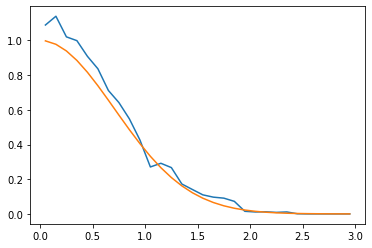

In [19]:
from pylab import *
%matplotlib inline

plot(qx,Pval)
plot(qx, exp(-qx**2));

# Speed up by numba

We will speed up simulation using numba. All parts that are called every single step are being recast into numba functions.

In [20]:
@jit(nopython=True)
def TrialStep0(qx, momentum):
    tiQ = int( random.rand()*len(qx) )               # trial iQ for qx[iQ]
    Ka_new = qx[tiQ]                                 # |r_0| length of the vector
    th, phi = pi*random.rand(), 2*pi*random.rand()   # spherical angles for vector q in spherical coordinates
    sin_th = sin(th)                                 # trial step probability is proportional to sin(theta) when using sperical coodinates
    Q_sin_th = Ka_new * sin_th
    K_new = array([Q_sin_th*cos(phi), Q_sin_th*sin(phi), Ka_new*cos(th)]) # new 3D vector r_0
    q2_sin2_old = sum(momentum[0,:2]**2)    # x^2+y^2 = r_old^2 sin^2(theta_old)
    q2_old = q2_sin2_old + momentum[0,2]**2 # x^2+y^2+z^2 = r_old^2 
    trial_ratio = 1.
    if q2_old != 0:                               # make sure we do not get nan
        sin_th_old = sqrt(q2_sin2_old/q2_old)     # sin(theta_old)
        if sin_th_old != 0:                       # make sure we do not get nan
            trial_ratio = sin_th/sin_th_old
    accept=True
    return (K_new, Ka_new, trial_ratio, accept, tiQ)

@jit(nopython=True)
def TrialStep1(iloop,momentum,dkF,cutoff):
    dk = (2*random.rand(3)-1)*dkF    # change of k in cartesian coordinates of size p.dkF
    K_new = momentum[iloop,:] + dk     # K_new = K_old + dK
    Ka_new = linalg.norm(K_new)        # norm of the new vector
    trial_ratio = 1.                   # trial step probability is just unity
    accept = Ka_new <= cutoff        # we might reject the step if the point is too far from the origin
    return (K_new, Ka_new, trial_ratio, accept)

@jit(nopython=True)
def Give_new_X(momentum, K_new, iloop):
    tmomentum = copy(momentum)
    tmomentum[iloop,:] = K_new  # this is trial configuration X_{new}=momentum
    return tmomentum


The function, which is being evaluated, will also be speed-up by Numba

In [21]:
@jit(nopython=True)
def cmpf(momentum, width, cnrm):
    kn = np.linalg.norm( momentum[-1] )
    res = exp( -(kn/width)**2 )/cnrm
    for i in range(len(momentum)-1):
        dk = np.linalg.norm( momentum[i+1]-momentum[i] )
        res *= exp( -(dk/width)**2 )
    return res

    
class FuncNDiag2:
    """  Gaussian through all diagonals k_i=k_j, i.e.:
    We have the following variables : k_0, k_1, k_2, ... k_{N-1}
    The function is
       fPQ = exp(k_{N-1}^2/width^2) * exp(|k_{N-2}-k_{N-1}|^2/width^2) * exp(-|k_{N-3}-k_{N-2}|^2/width^2) *...* exp(-|k_1-k_0|^2/width^2) * normalization
   We integrate only over k_1,k_2,...k_{N-1} and keep k_0 as external independent variable.
   We want the final result to be
      exp(-k_0^2/(width^2*N)) = Integrate[ fPQ d^3k_1 d^3k_2....d^3k_{N-1} ]
   Hence the normalization is
       normalization = N^(3/2) / ( sqrt(pi)*width )^(3(N-1))
    """
    def __init__(self, width=1, Ndim=1):
        self.width = width   # width of gaussians
        self.Ndim = Ndim
        self.cnrm = ((sqrt(pi)*self.width)**3 )**(Ndim-1)/sqrt(Ndim)**3  # integral of gaussian convolution

    def __call__(self, momentum):
        return cmpf(momentum, self.width, self.cnrm)


Checking that these Numba functions work.

In [23]:
from numpy import random

momentum = ones((4,3))
Nq = 30
qx = linspace( 3*0.5/Nq, 3*(Nq-0.5)/Nq, Nq)

TrialStep0(qx, momentum)
TrialStep1(2,momentum,0.2,10.)
print(Give_new_X(momentum, array([0.1,0.2,0.3]), 3))
print(momentum)

[[1.  1.  1. ]
 [1.  1.  1. ]
 [1.  1.  1. ]
 [0.1 0.2 0.3]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Finally, using these Numba function in the Metropolis routine. We will also time steps, to understand if the code is optimized.

In [24]:
import time

def IntegrateByMetropolis3(func, qx, p):
    """ Integration by Metropolis:
          func(momentum)   -- function to integrate
          qx               -- mesh given by a user
          p                -- other parameters
        Output:
          Pval(qx)
    """
    tm1 = time.time()
    random.seed(0)         # make sure that we always get the same sequence of steps
    # Next line needs CORRECTION for homework 
    Pval = zeros(len(qx))  # Final results V_physical is stored in Pval
    Pnorm = 0.0            # V_alternative is stored in Pnorm
    Pval_sum = 0.0         # this is widetilde{V_physical}
    Pnorm_sum = 0.0        # this is widetilde{V_alternative}
    V0norm = p.V0norm      # this is V0
    dk_hist = 1.0          # we are creating histogram by adding each configuration with weight 1.
    Ndim = func.Ndim       # dimensions of the problem
    inc_recompute = (p.per_recompute+0.52)/p.per_recompute # How often to self-consistently recompute
    # the wight functions g_i and h_{ij}.
    
    momentum = zeros((Ndim,3)) # contains all variables (r1,r2,r3,....r_Ndim)
    # We call them momentum here, but could be real space vectors or momentum space vectors.
    iQ = int(len(qx)*random.rand()) # which bin do we currently visit for r0, iQ is current r0=qx[iQ]
    momentum[1:,:] = random.random((Ndim-1,3)) * p.kF / sqrt(3.) # Initial guess for r1,r2,....r_N is random
    momentum[0,:] = [0,0,qx[iQ]]  # initial configuration for r_0 has to be consistent with iQ, and will be in z-direction

    # This is fm function, which is defined in mweight.py module
    mweight = meassureWeight(p.dexp, p.cutoff, p.kF, p.Nbin, Ndim) # measuring function fm in alternative space
    # fQ on the current configuration. Has two components (f(X), V0*f_m(X))
    fQ = func(momentum), V0norm * mweight( momentum )  # fQ=(f(X), V0*f_m(X))
    #print('starting with f=', fQ, '\nstarting momenta=', momentum)

    t_sim, t_mes, t_prn, t_rec = 0.,0.,0.,0.
    Nmeassure = 0  # How many measurements we had?
    Nall_q, Nall_k, Nall_w, Nacc_q, Nacc_k = 0, 0, 0, 0, 0
    c_recompute = 0 # when to recompute the auxiliary function?
    for itt in range(p.Nitt):   # long loop
        t0 = time.time()
        iloop = int( Ndim * random.rand() )   # which variable to change, iloop=0 changes external r_0
        accept = False
        if (iloop == 0):                      # changing external variable : r_0==Q
            Nall_q += 1                                      # how many steps changig external variable
            (K_new, Ka_new, trial_ratio, accept, tiQ) = TrialStep0(qx, momentum)
        else:   # changing momentum ik>0
            Nall_k += 1                        # how many steps of this type
            (K_new, Ka_new, trial_ratio, accept) = TrialStep1(iloop,momentum,p.dkF,p.cutoff)
        if (accept): # trial step successful. We did not yet accept, just the trial step.
            tmomentum = Give_new_X(momentum, K_new, iloop)
            fQ_new = func(tmomentum), V0norm * mweight(tmomentum) # f_new
            # Notice that we take |f_new(X)+V0*fm_new(X)|/|f_old(X)+V0*fm_old(X)| * trial_ratio
            # Next line needs CORRECTION for homework 
            ratio = (abs(fQ_new[0])+fQ_new[1])/(abs(fQ[0])+fQ[1]) * trial_ratio 
            accept = abs(ratio) > 1-random.rand() # Metropolis
            if accept: # the step succeeded
                momentum[iloop] = K_new
                fQ = fQ_new
                if iloop==0:
                        Nacc_q += 1  # how many accepted steps of this type
                        iQ = tiQ     # the new external variable index
                else:
                        Nacc_k += 1  # how many accepted steps of this type
        t1 = time.time()
        t_sim += t1-t0
        if (itt >= p.Nwarm and itt % p.tmeassure==0): # below is measuring every p.tmeassure steps
            Nmeassure += 1   # new meassurements
            # Next line needs CORRECTION for homework 
            W = abs(fQ[0])+fQ[1]             # this is the weight we are using
            f0, f1 = fQ[0]/W, fQ[1]/W        # the two measuring quantities
            # Next line needs CORRECTION for homework 
            Pval[iQ]  += f0                  # V_physical : integral up to a constant
            Pnorm     += f1                  # V_alternative : the normalization for the integral
            Pnorm_sum += f1                  # widetilde{V}_alternative, accumulated over all steps
            # Next line needs CORRECTION for homework 
            Wphs  = abs(f0)                  # widetilde{V}_{physical}, accumulated over all steps
            Pval_sum  += Wphs
            # doing histogram of the simulation in terms of V_physical only.
            # While the probability for a configuration is proportional to f(X)+V0*fm(X), the histogram for
            # constructing g_i and h_{ij} is obtained from f(X) only. 
            mweight.Add_to_K_histogram(dk_hist*Wphs, momentum, p.cutoff, p.cutoff)
            if itt>10000 and itt % (p.recomputew*p.tmeassure) == 0 :
                # Now we want to check if we should recompute g_i and h_{ij}
                # P_v_P is V_physical/V_alternative*0.1
                P_v_P = Pval_sum/Pnorm_sum * 0.1 
                # We expect V_physical/V_alternative*0.1=P_v_P to be of the order of 1.
                # We do not want to change V0 too much, only if P_V_P falls utside the
                # range [0.25,4], we should correct V0.
                change_V0 = 0
                if P_v_P < 0.25 and itt < 0.2*p.Nitt:  # But P_v_P above 0.25 is fine
                    change_V0 = -1  # V0 should be reduced
                    V0norm    /= 2  # V0 is reduced by factor 2
                    Pnorm     /= 2  # V_alternative is proportional to V0, hence needs to be reduced too. 
                    Pnorm_sum /= 2  # widetilde{V}_alternative also needs to be reduced
                if P_v_P > 4.0 and itt < 0.2*p.Nitt: # and P_v_P below 4 is also fine
                    change_V0 = 1   # V0 should be increased 
                    V0norm    *= 2  # actually increasing V0
                    Pnorm     *= 2
                    Pnorm_sum *= 2
                if change_V0:       # V0 was changed. Report that. 
                    schange = ["V0 reduced to ", "V0 increased to"]
                    print('%9.2fM P_v_P=%10.6f' % (itt/1e6, P_v_P), schange[int( (change_V0+1)/2 )], V0norm )
                    # Here we decied to drop all prior measurements if V0 is changed.
                    # We could keep them, but the convergence can be better when we drop them.
                    # Next line needs CORRECTION for homework 
                    Pval = zeros(shape(Pval))
                    Pnorm = 0
                    Nmeasure = 0
                # Next we should check if g_i and h_ij need to be recomputed.
                # This should not be done too often, and only in the first half of the sampling.
                if (c_recompute==0 and itt<0.7*p.Nitt):
                    t5 = time.time()
                    # At the beginning we recompute quite often, later not so often anymore
                    # as the per_recompute is increasing...
                    p.per_recompute = int(p.per_recompute*inc_recompute+0.5)
                    # We normalized f_m, hence all previous accumulated values are now of the order
                    # of 1/norm. We also normalize the new additions to histogram with similar value, 
                    # but 5-times larger than before.
                    dk_hist *= 5*mweight.Normalize_K_histogram()
                    if dk_hist < 1e-8: # Once dk becomes too small, just start accumulating with weight 1.
                        dk_hist = 1.0
                    mweight.Recompute()# Here we actually recompute g_i and h_{ij}.
                    fQ = func(momentum), V0norm * mweight( momentum ) # And now we must recompute V0*f_m, because f_m has changed!
                    t6 = time.time()
                    print('%9.2fM recomputing f_m=%10.6f' % (itt/1e6, fQ[1]))
                    t_rec += t6-t5
                c_recompute += 1
                if c_recompute>=p.per_recompute : c_recompute = 0 # counting when we will recompute next.
        t2 = time.time()
        t_mes += t2-t1
        if (itt+1)% p.Ncout == 0 : # This is just printing information
            P_v_P = Pval_sum/Pnorm_sum * 0.1 # what is curent P_v_P
            Qa = qx[iQ]                      # current r0
            ka = linalg.norm(momentum[1,:])  # current r1
            # Next line needs CORRECTION for homework 
            ratio = (abs(fQ_new[0])+fQ_new[1])/(abs(fQ[0])+fQ[1]) # current ratio
            # Next line needs CORRECTION for homework 
            print( '%9.2fM Q=%5.3f k=%5.3f fQ_new=%8.3g,%8.3g fQ_old=%8.3g,%8.3g P_v_P=%10.6f' % (itt/1e6, Qa, ka, fQ_new[0], fQ_new[1], fQ[0], fQ[1], P_v_P) )
        t3 = time.time()
        t_prn += t3-t2
        
    Pval *= len(qx) * V0norm / Pnorm  # Finally, the integral is I = V0 *V_physical/V_alternative
    # This would be true if we are returning one single value. But we are sampling len(qx) values
    # And we jump between qx[i] uniformly, hence each value should be normalized with len(qx).
    tp1 = time.time()
    print('Total acceptance rate=', (Nacc_k+Nacc_q)/(p.Nitt+0.0), 'k-acceptance=', Nacc_k/(Nall_k+0.0), 'q-acceptance=', Nacc_q/(Nall_q+0.0))
    print('k-trials=', Nall_k/(p.Nitt+0.0), 'q-trial=', Nall_q/(p.Nitt+0.0) )
    print('t_simulate=%6.2f t_meassure=%6.2f t_recompute=%6.2f t_print=%6.2f t_total=%6.2f' % (t_sim, t_mes, t_rec, t_prn, tp1-tm1))
    return (Pval,mweight)

In [26]:
from numpy import random

p = params()
p.Nitt = 3000000 
Ndim = 6
width = 1./sqrt(Ndim)
fnc = FuncNDiag2(width, Ndim)

Nq = 30
qx = linspace( 3*0.5/Nq, 3*(Nq-0.5)/Nq, Nq)
(Pval,mweight) = IntegrateByMetropolis3(fnc, qx, p)

     0.02M P_v_P=1324.512340 V0 increased to 0.04
     0.02M recomputing f_m=  0.005120
     0.04M P_v_P=  8.016355 V0 increased to 0.08
     0.05M Q=0.750 k=0.850 fQ_new=  0.0898,1.38e-10 fQ_old=  0.0898,1.38e-10 P_v_P=  4.394104
     0.10M Q=2.650 k=0.354 fQ_new= 6.5e-16,    1.01 fQ_old= 6.5e-16,    1.01 P_v_P=  0.817835
     0.15M Q=0.150 k=0.288 fQ_new=    29.8,    1.82 fQ_old=    29.8,    1.82 P_v_P=  0.521219
     0.18M recomputing f_m=  0.001133
     0.20M Q=0.150 k=0.467 fQ_new=0.000215, 5.2e-08 fQ_old= 0.00106, 5.2e-08 P_v_P=  0.378995
     0.25M Q=0.550 k=0.625 fQ_new=    3.86,  0.0175 fQ_old=    3.86,  0.0175 P_v_P=  0.369187
     0.30M Q=1.150 k=0.430 fQ_new= 0.00169, 0.00601 fQ_old= 0.00169, 0.00601 P_v_P=  0.354699
     0.35M Q=0.050 k=0.376 fQ_new=0.000394,0.000319 fQ_old=  0.0364,0.000319 P_v_P=  0.363482
     0.36M recomputing f_m=  0.000000
     0.40M Q=1.250 k=1.389 fQ_new=  0.0473,2.02e-09 fQ_old=  0.0772,5.09e-09 P_v_P=  0.349935
     0.45M Q=0.350 k=0.194 fQ_new= 

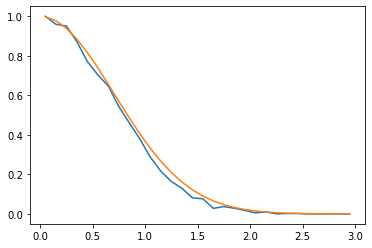

In [27]:
from pylab import *
%matplotlib inline


plot(qx,Pval)
plot(qx, exp(-qx**2));


Next plotting the auxiliary function $f_m$ projections $g(r)$ to all $r$.

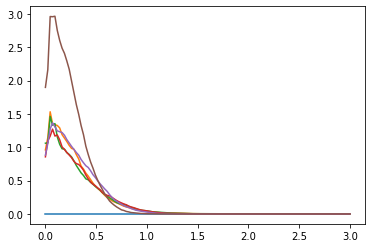

In [28]:
gx = mweight.gx
for ik in range(len(gx)):
    plot(linspace(0,p.cutoff,shape(gx)[1]), gx[ik,:])

Here is the auxiliary function $f_m$ for convolutios $h(r)$ versus $r$.

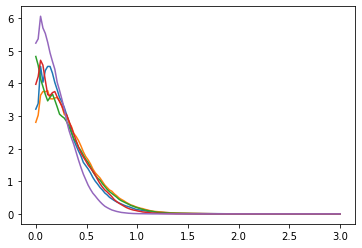

In [29]:
hx = mweight.gx_off
for ik in range(len(hx)):
    plot(linspace(0,p.cutoff,shape(gx)[1]), hx[ik,:])

### 1D Convolutions

The power of Metropolis integration is that we have freedom to pick an appropriate normalized function. This can come from physical intuition into processes being modeled.
In most physical process the convolutions (correlations between particles) turn out to be important, hence convolution type ansatz considerably improves the precision. The convolutions can still be worked out analytically, even though they are more tedious to derive.

To derive the integral, we will concentrate on a specific form of convolution,i.e.,
\begin{eqnarray}
f_m(x_1,x_2,\cdots,x_n)= \sum_{j=1}^n g_j(x_j)\prod_{i=1,i\ne j}^n g_i(x_i) h_{ij}(x_j-x_i)
\end{eqnarray}
As before, the two functions can be determined self-consistently by projections
\begin{eqnarray}
&g_i(x)=&\int dy_1 dy_2\cdots dy_n |f(y_1,y_2,\cdots,y_n)|\delta(y_i-x)\\
&h_{ij}(x_j-x_i)=&\int dy_1 dy_2\cdots dy_n |f(y_1,y_2,\cdots,y_n)|\delta(x_j-x_i-(y_j-y_i))
\end{eqnarray}


To normalize $f_m$ we need to evaluate the integral
\begin{eqnarray}
\int dx_1\cdots dx_n f_m = \sum_{j=1}^n \int dx_j g(x_j) \prod_{i\ne j}^{n} \int dx_i g_i(x_i) h_{ij}(x_j-x_i) 
\end{eqnarray}
Withouth loss of generality, we will work out one term in the sum, namely,
\begin{eqnarray}
I^N = \int dx_N g(x_N) \prod_{i\ne N} \int dx_i g_i(x_i) h_{ij}(x_j-x_i) 
\end{eqnarray}
so that the end result is
\begin{eqnarray}
\int dx_1\cdots dx_n f_m = \sum_j I^j
\end{eqnarray}

This integral is combersome because all the functions are pice-wise
constant, which leads to somewhat lengthly derivations.
We can write
$x_N= \Delta (j_N + t)$, $x_i = \Delta(j_i + u)$ with $t\in[0,1]$ and
$u\in[0,1]$ and $j_i$ integers. Note that $g(\Delta(j+u))=g[j]$ for
any $u\in [0,1]$. For simplicity, 
below we will drop $\Delta$ inside function arguments, i.e.,
$g(\Delta(j+u))\equiv g(j+u)$

The integral can thus be turned into
\begin{eqnarray}
\int f_m = \Delta \sum_{j_N} g[j_N] \int_0^1 dt \prod_{i=1}^{N-1} 
\Delta \sum_{j_i} \int_0^1 du g_i(j_i+u) h_i(j_N+t-j_i-u) \\
=\Delta^N \sum_{j_N} g[j_N] \int_0^1 dt \prod_{i=1}^{N-1} 
\sum_{j_i} g_i[j_i] \int_0^1 du\; h_i(j_N-j_i+t-u) 
\end{eqnarray}
Since both $t$ and $u$ are in the interval $[0,1]$, $t-u$ is in the
interval $[-1,1]$, and there are two possibilities,

* $t-u<0$  $\rightarrow$ $h_i(j_N-j_i+t-u)=h_i[j_N-j_i-1]$ 
* $t-u>0$  $\rightarrow$ $h_i(j_N-j_i+t-u)=h_i[j_N-j_i]$

we thus recognize
\begin{eqnarray}
\int_0^1 du\; 
h_i(j_N-j_i+t-u) = 
\int_0^1 du\; 
\left(\begin{array}{c}
h_i[j_N-j_i] \Theta(0<u<t))  \\
 h_i[j_N-j_i-1] \Theta(t<u<1) 
\end{array}\right)
\\
=h_i[j_N-j_i-1] (1-t) +  h_i[j_N-j_i] t
%\\=h_i[j_N-j_i]  + (h_i[j_N-j_i-1]-h_i[j_N-j_i])(1-t)
\end{eqnarray}

We can define new arrays
\begin{eqnarray}
a_i[j_N] &=& \Delta \sum_j g_i[j] h_i[j_N-j] \\
b_i[j_N] &=& \Delta \sum_j g_i[j] (h_i[j_N-j_i-1]-h_i[j_N-j_i])\\
\end{eqnarray}
to obtain the final integral
\begin{eqnarray}
I^N =\Delta \sum_{j_N} g[j_N] 
\int_0^1 dt \prod_{i=1}^{N-1}
\left( a_i[j_N] + b_i[j_N] t \right) 
\end{eqnarray}
which can be expanded to a polynomial of $N-1$-th order, and evaluated
\begin{eqnarray}
I^N =\Delta \sum_{j_N} g[j_N] 
\left(
\prod_{i=1}^{N-1} a_i[j_N]+
\cdots
+ \frac{1}{N}\prod_{i=1}^{N-1} b_i[j_N] \right) 
\end{eqnarray}
Once we know the integral $\int f_m$, we scale all $h_i$ by
$h_i \rightarrow \frac{h_i}{(\int f_m)^{1/(N-1)}}$


###  3D convolutions

Multiple 3D-type ingerals are very common, and deserve special
attention. It is many times physically more appropriate to write the
ansatz in terms of radial functions $g(|\vec{r}_i|)$ rather than use
separate $g(x)$, $g(y)$, $g(z)$. We might want to use a convolution
ansatz of the form
\begin{eqnarray}
 f_m(\vec{r}_1,\vec{r}_2,\cdots,\vec{r}_n)= g_1(r_1) h_1(|\vec{r}_n-\vec{r}_1|)
g_2(r_2)h_2(|\vec{r}_n-\vec{r}_2|)\cdots g_n(r_n)
\end{eqnarray}
The histogram for projections to $|\vec{r}_i|$ and $|\vec{r}_n-\vec{r}_i|$ is
straighforward to obtain during simulation.

The analytic integral $\int f_m$ is somewhat more challenging for 3D
case. We derive it below:
\begin{eqnarray}
\int f_m = \int d^3r_n g_n(r_n)\prod_i \int d^3 r_i g_i(r_i)
  h_i(|\vec{r}_n-\vec{r}_i|)
\\=
4\pi  \int d r_n r_n^2 g_n(r_n)\prod_{i=1}^{n-1}\int dr_i
  2\pi r_i^2 
\\
\int_{-1}^1 d(\cos\theta)g_i(r_i)  h_i(\sqrt{r_n^2+r_i^2-2 r_n r_i \cos(\theta)})
\end{eqnarray}

\begin{eqnarray}
\int f_m =
2 (2\pi)^n  \int d r_n r_n^{3-n} g_n(r_n)\prod_{i=1}^{n-1}\int dr_i r_i g_i(r_i)  
\int_{|r_n-r_i|}^{r_n+r_i} dx\, x\, h_i(x) 
\end{eqnarray}
Next we integrate over pice-wise constant functions
\begin{eqnarray}
r_n = j_n + t\\
r_i = j + u
\end{eqnarray}
with $t\in[0,1]$ and $u\in[0,1]$, and we get
\begin{eqnarray}
&&\int f_m =
2 (2\pi\Delta^3)^n  \sum_{j_n}  g_n[j_n]\int_0^1 dt (j_n+t)^{3-n}\times
\nonumber\\
&& \times
\prod_{i=1}^{n-1}\sum_j g_i[j] \int_0^1 du (j+u) 
\int_{|j_n-j+t-u|}^{j_n+j+t+u} dx\, x\, h_i(x) 
\end{eqnarray}
Lets define
\begin{eqnarray}
F_i(j_n+t) \equiv \sum_j g_i[j] \int_0^1 du (j+u) 
\int_{|j_n-j+t-u|}^{j_n+j+t+u} dx\, x\, h_i(x) 
\end{eqnarray}
and by power counting we can see that $F_i(t)$ is polynomial in $t$ of the forth order.

The derivation of polynomials $F_i[j_n](t)$ is somewhat tedious and
will be given below in Sec.(Integrals $K_n$).
But before that, lets us show how to compute the integral $\int f_m$
if the polynomials $F_i[j_n](t)$ are given:
\begin{eqnarray}
\int f_m =
2 (2\pi\Delta^3)^n  \sum_{j_n}  g_n[j_n]\int_0^1 dt (j_n+t)^{3-n}
\prod_{i=1}^{n-1} F_i[j_n](t)
\label{Eq:31}
\end{eqnarray}
Note that 
$\prod_{i=1}^{n-1} F_i[j_n](t)$ is a polynomial of $4(n-1)$-th order,
and we write it as
\begin{eqnarray}
\prod_{i=1}^{n-1} F_i[j_n](t)  \equiv \sum_{k=0}^{4(n-1)} a_k t^k
\end{eqnarray}
Such multiplication of polynomials can be straighforwardly implemented
on the computer, and if polynomials $F_i[j_n](t)$ are known, the coefficients $a_k$ are easy to determine.

The integral of the function $f_m$ than requires one to evaluate
\begin{eqnarray}
K_n[j_n]= \int_0^1 dt (j_n+t)^{3-n} \sum_{k=0}^{4(n-1)} a_k t^k
\end{eqnarray}
so that the final result becomes
\begin{eqnarray}
\int f_m =2 (2\pi\Delta^3)^n  \sum_{j_n}  g_n[j_n] K_n[j_n]
\end{eqnarray}



#### Integrals $K_n$

For $n \ge 3$ all powers in the integral $K_n$ are positive, and we can write
\begin{eqnarray}
K_n[j]= 
\sum_{p=0}^{3-n} 
{3-n\choose p}
(j)^p \sum_{k=0}^{4(n-1)} a_k \int_0^1 dt\, t^{3-n-p+k}
\\
=
\sum_{p=0}^{3-n} 
{3-n\choose p}
(j)^p \sum_{k=0}^{4(n-1)} \frac{a_k}{4+k-n-p} 
\end{eqnarray}
For $n=4$ we have
\begin{eqnarray}
K_n[j]= \sum_{k=0}^{4(n-1)} a_k \int_0^1 dt \frac{t^k}{j+t}
\end{eqnarray}
which can be computed by recursion. Let's define
\begin{eqnarray}
I_k[j]\equiv \int_0^1 dt \frac{t^k}{j+t}
\end{eqnarray}
so that 
\begin{eqnarray}
K_n[j]= \sum_{k=0}^{4(n-1)} a_k I_k[j]
\end{eqnarray}
It is easy to see that $I_0[j]=\log(\frac{j+1}{j})$ and that 
$$I_{k+1}[j]=\int_0^1 t^k dt - j I_k[j]= \frac{1}{k+1} -  j I_k[j]$$
which gives
$$I_k[j] = \sum_{p=0}^{k-1}\frac{ (-j)^p}{k-p} + (-j)^k  \log(\frac{j+1}{j})$$

Finally, for $n>4$, we define
$$ I^p_k[j] = \int_0^1 \frac{t^k}{(j+t)^{p+1}} dt$$
so that $K_n$ can be simply computed by
\begin{eqnarray}
K_n[j_n]= \sum_{k=0}^{4(n-1)} a_k I_k^{n-4}[j_n]
\end{eqnarray}
and we derive the recursion relation for integrals
$I_k^p[j]$. Notice that the previous case $n=4$ corresponds to $p=0$,
but now we will derive recurison for any $n \ge 4$.

We notice that
\begin{eqnarray}
I_{k+1}^p= I_k^{p-1}- j\, I_k^p, 
\label{Eq:recursion}
\end{eqnarray}
which follows from the definition
\begin{eqnarray}
I^p_{k+1} = \int_0^1 \frac{t^k(t+j-j)}{(j+t)^{p+1}} dt = \int_0^1
  \frac{t^k}{(j+t)^{p}} dt -j\int_0^1 \frac{t^k}{(j+t)^{p+1}} dt
\end{eqnarray}
This can be used to compute any $I_k^p$ if we know 
$I^{-1}_k$, which is simply given by 
$$I^{-1}_k=\frac{1}{k+1}$$ and 
$I_0^p$ for
arbitrary $p$. We notice that
\begin{eqnarray}
I^{p>0}_{0} = \int_0^1 \frac{1}{(j+t)^{p+1}} dt = \frac{1}{p}\left(\frac{1}{j^p}-\frac{1}{(j+1)^p}\right)
\end{eqnarray}
and $I^0_0 = \log\left(\frac{j+1}{j}\right)$
hence the above recursion gives an arbitrary $I_k^p$.

To show that all $I_k^p$ are now determined, lets show for a first few
$p$. For $p=0$ we get
\begin{eqnarray}
I^0_{k+1}= I^{-1}_k - j I^0_k = \frac{1}{k+1} - j I^0_k 
\end{eqnarray}
which is exactly the recursion relation we derived earlier.
Once all $I^0_k$ are determined, we can proceed to compute $I^1_{k}$ by the
recursion
\begin{eqnarray}
I^1_{k+1}= I^{0}_k - j I^1_k
\end{eqnarray}
Since we know $I^1_0$, all $I^1_k$ can readily be obtained from this
recursion relation. And once $I^1_k$ are known, $I^2_k$ are determined
by the recursion relation specified above $I_{k+1}^p= I_k^{p-1}- j\, I_k^p$  


# Homework


Using Metropolis integration evaluate the following Linhardt function:

\begin{eqnarray}
P(\Omega,\vec{q}) = -2 \int \frac{d^3k}{(2\pi)^3} \frac{f(\varepsilon_{\vec{k}+\vec{q}})-f(\varepsilon_{\vec{k}})}{\Omega-\varepsilon_{\vec{k}+\vec{q}}+\varepsilon_\vec{k}+i\delta}
\end{eqnarray}

Here $\varepsilon_\vec{k}=k^2-k_F^2$.

We will use $k_F=\frac{(\frac{9\pi}{4})^{1/3}}{rs}$ with $r_s=2$, $f(x) = \frac{1}{\exp(x/T)+1}$, $T=0.02 k_F^2$, $\delta = 0.002 k_F^2$, and cutoff is $3 k_F$.

We will use linear mesh of frequency $\Omega=[0,k_F^2]$ with 100 points, and $q$ mesh $q=[0.1 k_F,0.2 k_F,0.3 k_F,0.4 k_F]$. We will plot the family of curves for $P(\Omega,q)$.

We will run for `p.Nitt`=5000000 steps.

The result for $P(\Omega=0,q<< k_F)$ should be close to $-n_F$, where $n_F = \frac{k_F}{2\pi^2}$.

We will use Linhardt function from previous homework, but slightly modify it, so that the input `momentum` contains $\vec{q}$ is the first vector and $\vec{k}$ as the second vector. (The dimension `Ndim` will thus be set to 2.) The function will return an array of values, corresponding to all frequencies.

The Metropolis algorithm has to be modified so that it takes an array of values. The probability will be proportional to the value at zero frequency $P(\Omega=0)$, but we will measure all frequencies at the same time.


### Here we summarize all the necessary changes to the  `IntegrateByMetropolis3` routine

We marked all lines that require change by 

`# Next line needs CORRECTION for homework `

* `Pval[iq,iOm]` becomes $q$ and $\Omega$ array.

* When we compute ratio, we need to take only the zero frequency value of the function, i.e., `abs(fQ_new[0][0])` and `fQ[0][0]`.

* In measurement, the weight `W` should depend only zero frequency value only, to cancel the probability from the Metropolis, i.e., `abs(fQ[0][0])`

* When measuring, we need to properly update the values `Pval[iQ,:]+= f0`.

* The physical weight $\widetilde{V}_{physical}$ for determining if `V0` is of the right magnitude, needs to be changed so that it depends on zero frequency only `f0[0]`

* When we reset the stored values in `Pval`, we need to create array of proper size and type
`Pval = zeros(shape(Pval), dtype=complex)` 

* Printing should be modified, for example `ratio` has to be correctly modified to depend on zero frequency obly, and only the zero frequency value of the function is printed out.